# Exploratory Data Analysis :


In [1]:
# Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge



In [2]:
df = pd.read_csv(r"C:\Users\sahil\Desktop\excelr data science\Assignments\MLR\ToyotaCorolla - MLR.csv")

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df.shape 

(1436, 11)

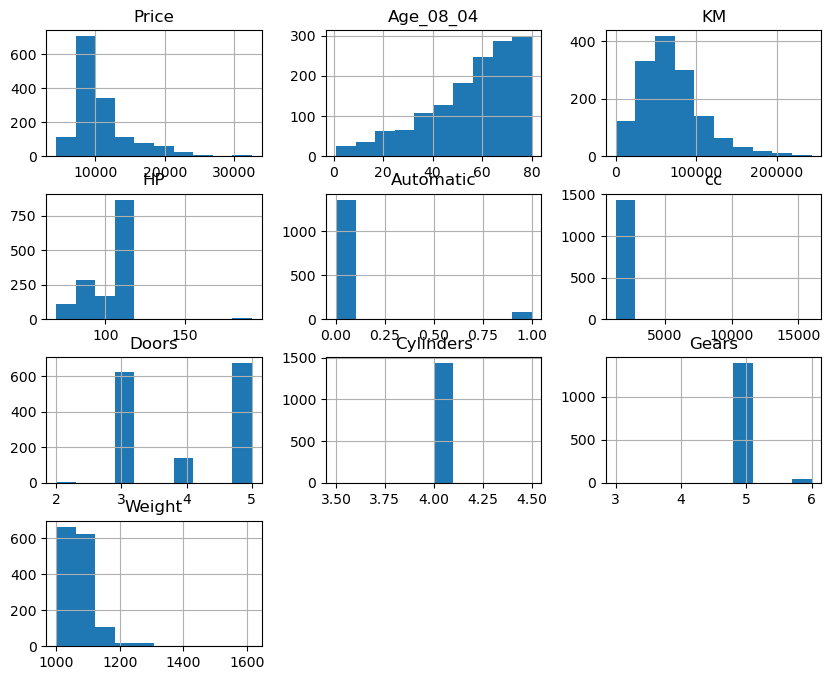

In [8]:
# Histogram
df.hist(figsize=(10, 8))
plt.show()


In [9]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

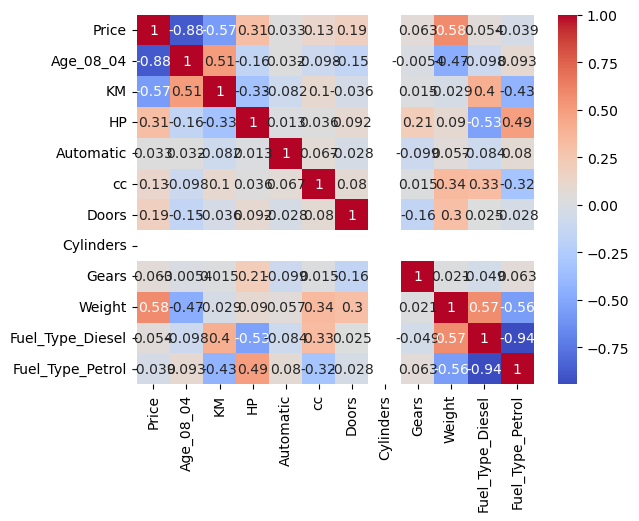

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Standardize numerical features
scaler = StandardScaler()
features_to_scale = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Model Building


In [12]:
# Split the dataset into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((1148, 11), (288, 11), (1148,), (288,))

In [15]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Model 1: Basic MLR")
print(f'R-squared: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Model 1: Basic MLR
R-squared: 0.8348888040611082
MSE: 2203043.823143703
RMSE: 1484.2654153296514


In [17]:
# Model 2: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [18]:
# Predictions and Evaluation for Lasso
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5

print("\nModel 2: Lasso Regression")
print(f'R-squared: {r2_lasso}')
print(f'MSE: {mse_lasso}')
print(f'RMSE: {rmse_lasso}')


Model 2: Lasso Regression
R-squared: 0.8349528783917571
MSE: 2202188.8928795527
RMSE: 1483.9773896119686


In [19]:
# Model 3: Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [20]:
# Predictions and Evaluation for Ridge
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5


In [21]:
print("\nModel 3: Ridge Regression")
print(f'R-squared: {r2_ridge}')
print(f'MSE: {mse_ridge}')
print(f'RMSE: {rmse_ridge}')


Model 3: Ridge Regression
R-squared: 0.8349299080806993
MSE: 2202495.3808896705
RMSE: 1484.0806517469562
